In [1]:
import pandas as pd
from glob import glob

In [2]:
df_hail = pd.read_csv('/Users/sean/Downloads/hail.csv',index_col='property_id')
df_non_hail = pd.read_csv('/Users/sean/Downloads/non_hail.csv',index_col='property_id')
df = pd.concat([df_hail,df_non_hail])
df

,date,latitude,longitude,street,city,state,zip,roof_material
property_id,,,,,,,,
242869,2019-04-02,36.132733,-95.954127,2552 E 21st,Tulsa,OK,74114,clay_tile
395669,2018-01-18,35.561618,-97.566895,9002 N. May Ave.,Oklahoma City,OK,73120,asphalt_shingle
334373,2019-07-11,29.748045,-95.752006,2240 S Mason Rd,Katy,TX,77450,metal_panel
330890,2018-12-15,26.117795,-97.166963,130 E Saturn Ln,South Padre Island,TX,78597,clay_tile
383845,2019-09-18,39.084443,-108.460391,549 32 Rd,Clifton,CO,81520,metal_panel
...,...,...,...,...,...,...,...,...
443293,2019-09-22,36.258511,-115.283318,5380 N RILEY ST,LAS VEGAS,NV,89149,clay_tile
378598,2019-06-02,39.511715,-119.787681,1650 Vassar St,Reno,NV,89502,metal_panel
298271,2019-06-02,39.513313,-119.952044,2915 HIGHWAY 40 W,VERDI,NV,89439,metal_panel


In [3]:
df_score_hail = pd.read_csv('/Users/sean/projects/DS/ds-analysis/Analysis/scoreChange/hail_scores.csv',index_col='property_id')
df_score_no_hail = pd.read_csv('/Users/sean/projects/DS/ds-analysis/Analysis/scoreChange/non_hail_scores.csv',index_col='property_id')
df_scores = pd.concat([df_score_hail,df_score_no_hail])
df_scores

,0
property_id,
134559,0.734891
136639,0.368377
163169,1.000000
163468,1.000000
163525,0.926156
...,...
629160,1.000000
629331,0.885829
629338,0.941070


<AxesSubplot:>

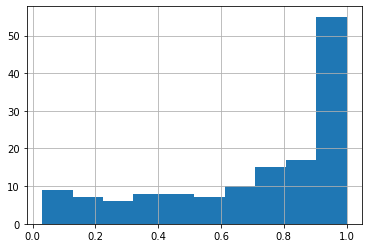

In [9]:
result = pd.concat([df, df_scores], axis=1, join="inner")
result['0'].hist()

In [12]:
df['scores']=result['0']

In [14]:
df

,date,latitude,longitude,street,city,state,zip,roof_material,scores
property_id,,,,,,,,,
242869,2019-04-02,36.132733,-95.954127,2552 E 21st,Tulsa,OK,74114,clay_tile,0.683999
395669,2018-01-18,35.561618,-97.566895,9002 N. May Ave.,Oklahoma City,OK,73120,asphalt_shingle,0.909457
334373,2019-07-11,29.748045,-95.752006,2240 S Mason Rd,Katy,TX,77450,metal_panel,1.000000
330890,2018-12-15,26.117795,-97.166963,130 E Saturn Ln,South Padre Island,TX,78597,clay_tile,1.000000
383845,2019-09-18,39.084443,-108.460391,549 32 Rd,Clifton,CO,81520,metal_panel,0.270947
...,...,...,...,...,...,...,...,...,...
443293,2019-09-22,36.258511,-115.283318,5380 N RILEY ST,LAS VEGAS,NV,89149,clay_tile,1.000000
378598,2019-06-02,39.511715,-119.787681,1650 Vassar St,Reno,NV,89502,metal_panel,0.985070
298271,2019-06-02,39.513313,-119.952044,2915 HIGHWAY 40 W,VERDI,NV,89439,metal_panel,1.000000


In [21]:
df.set_index('date').to_csv('roof_scores.csv')